#### **This notebook test for the model with each features set**

In [5]:
import pandas as pd
import numpy as np
import warnings
import os

import importlib

#### packages
import helper.visualization as viz_hp
import helper.stat_helper as stat_hp
import config.config as config_hp

#### **Save features**

In [ ]:
import helper.stat_helper as stat_hp
importlib.reload(stat_hp)

config = config_hp.config()
stats = config['STATS']

df_all_stat = pd.DataFrame()

features = [
            'quote_count',
           'like_count',
           'retweet_count',
           'reply_count',
           'reply_time_diff',
           # 'age_stats',
           'language_count',
           'mention_count',
           'hashtag_count',
           'url_count',
           'cosine',
            'original_tweet_reply_count'
              ]

print(len(features))

for metric in features:
    df_metric = pd.read_pickle(stats[metric])
    print(df_metric['tweet_label'].nunique())
    print(df_metric.columns)
    
    df_metric = df_metric.astype({
        'poster_tweetid': str,
        'tweet_label': int
    })
    if metric == 'quote_count':
        df_all_stat = df_metric
    else:
        df_all_stat = df_all_stat.merge(df_metric,
                     on=['poster_tweetid',
                         'tweet_label'
                        ]
                    )
df_all_stat.to_pickle(stats['all_features'])

11
2
Index(['poster_tweetid', 'mean_quote_count', 'std_quote_count',
       'min_quote_count', '25%_quote_count', '50%_quote_count',
       '75%_quote_count', 'max_quote_count', 'skew_quote_count',
       'kurtosis_quote_count', 'list_quote_count', 'range_quote_count',
       'iqr_quote_count', 'entropy_quote_count', 'tweet_label'],
      dtype='object')
2
Index(['poster_tweetid', 'mean_like_count', 'std_like_count', 'min_like_count',
       '25%_like_count', '50%_like_count', '75%_like_count', 'max_like_count',
       'skew_like_count', 'kurtosis_like_count', 'list_like_count',
       'range_like_count', 'iqr_like_count', 'entropy_like_count',
       'tweet_label'],
      dtype='object')
2
Index(['poster_tweetid', 'mean_retweet_count', 'std_retweet_count',
       'min_retweet_count', '25%_retweet_count', '50%_retweet_count',
       '75%_retweet_count', 'max_retweet_count', 'skew_retweet_count',
       'kurtosis_retweet_count', 'list_retweet_count', 'range_retweet_count',
       'iqr_r

In [ ]:
# df_all_stat['tweet_label'].unique()
df_all_stat.to_pickle(stats['all_features'])

In [42]:
df_all_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7732 entries, 0 to 7731
Columns: 116 entries, poster_tweetid to reply_count_by_age
dtypes: float64(100), int64(7), object(9)
memory usage: 6.9+ MB


#### **Load Files**

In [6]:
importlib.reload(stat_hp)

import importlib

importlib.reload(config_hp)

config = config_hp.config()
stat = config['STATS']

all_features_with_posted = stat['all_features_with_posted']

df_all_stat = pd.read_pickle(all_features_with_posted)

In [7]:
set(df_all_stat.isnull().any())

{False}

#### **Remove Lang and Quote**

In [8]:
columns_not_include = [
    'list_quote_count',
    'list_like_count',
    'list_retweet_count',
    'list_reply_count',
    'list_reply_time_diff',
    # 'list_age_stats',
     'mad_diff_min',
    'cof_diff_min',
    'list_language_count',
    'list_mention_count',
    'list_hashtag_count',
    'list_url_count',
    'list_num_hashtags',
    'count_diff_min',
    'list_diff_min',
    'list_num_url',
    'list_cosine',
    'var_cosine',
    'var_diff_min',
    'var_mention_count',
    'var_num_hashtags',
    'reply_count_by_age',
    'language_count',
    'reply_count_by_age',
]

all_columns = [x for x in df_all_stat.columns]

#Exculde language features
specific_string = 'lang'
matching_lang = [col for col in all_columns if specific_string in col]

#Exclude quote features
specific_string = 'quote'
matching_columns = [col for col in all_columns if specific_string in col]

columns_not_include.extend(matching_lang)
columns_not_include.extend(matching_columns)

print(len(columns_not_include))

columns_to_keep = list(set(df_all_stat.columns) - set(columns_not_include))
df_test = df_all_stat[columns_to_keep]

37


In [9]:
len(df_test.columns)

101

#### **Save the features**

In [10]:
importlib.reload(config_hp)

config = config_hp.config()
stat = config['STATS']

final_stat = stat['final_stat']

df_test.to_pickle(final_stat)

#### **All feature test**


 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 99)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       790
           1       0.81      0.83      0.82       774

    accuracy                           0.82      1564
   macro avg       0.82      0.82      0.82      1564
weighted avg       0.82      0.82      0.82      1564

[[639 151]
 [135 639]]
Cross validation: mean 0.76 f1 with a standard deviation of 0.04
Cross validation: mean 0.77 precision with a standard deviation of 0.06
Cross validation: mean 0.76 recall with a standard deviation of 0.05
Cross validation: mean 0.84 auc with standard deviation of 0.05
                      Importance
Feature                         
entropy_reply_count     0.035402
org_reply_count         0.033745
posted_like_count       0.030649
entropy_cosine          0.030272
mean_like_count         0.028896
std_like_count    

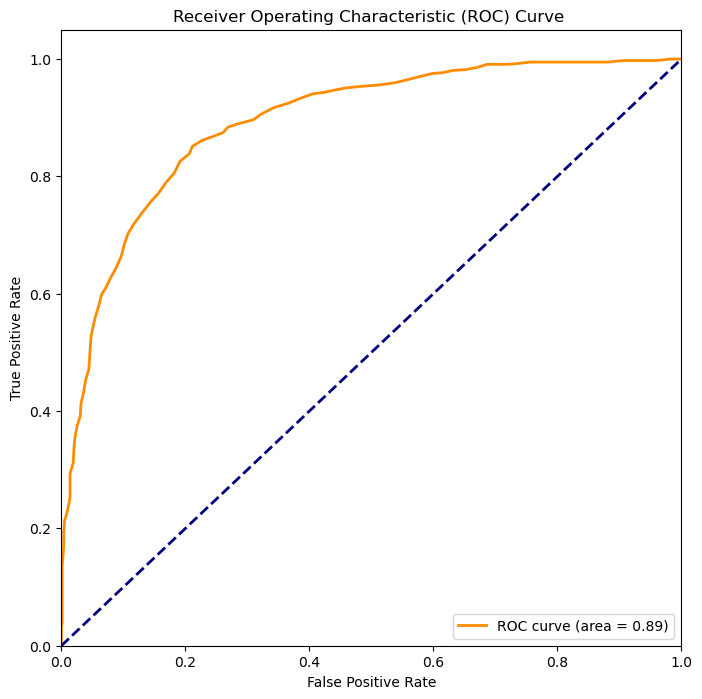

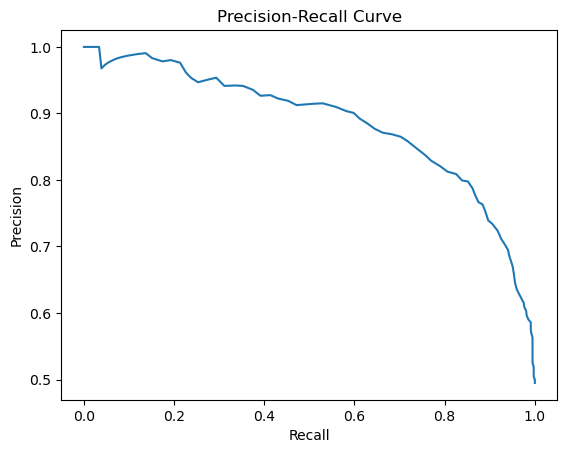

0.77
0.76
0.76
0.84


In [33]:
model, df_pred, roc_auc, prf_1, prf_0, mean_score_f1, std_score_f1, final_score = \
    stat_hp.run_model(df_test,
                      columns_not_include=[],
                      model_type='random', 
                      pca=False,
                      y_column = 'tweet_label',
                      filename=None,
                      just_f1=False,
                      find_threshold=False
                     )

print(final_score['mean_precision'])
print(final_score['mean_recall'])
print(final_score['mean_f1'])
print(final_score['mean_auc'])

#### **Tweet Classifier: Model test different features**

Running the model
14

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 12)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
0.9870441458733206
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       790
           1       0.62      0.55      0.58       774

    accuracy                           0.61      1564
   macro avg       0.61      0.61      0.61      1564
weighted avg       0.61      0.61      0.61      1564

[[525 265]
 [346 428]]
Cross validation: mean 0.57 f1 with a standard deviation of 0.03
Cross validation: mean 0.6 precision with a standard deviation of 0.03
Cross validation: mean 0.55 recall with a standard deviation of 0.04
Cross validation: mean 0.64 auc with standard deviation of 0.04
                   Importance
Feature                      
skew_diff_min        0.119161
kurtosis_diff_min    0.118986
entropy_diff_min     0.118811
std_diff_min         0.114648
mean_diff_min        0.105508
iqr_

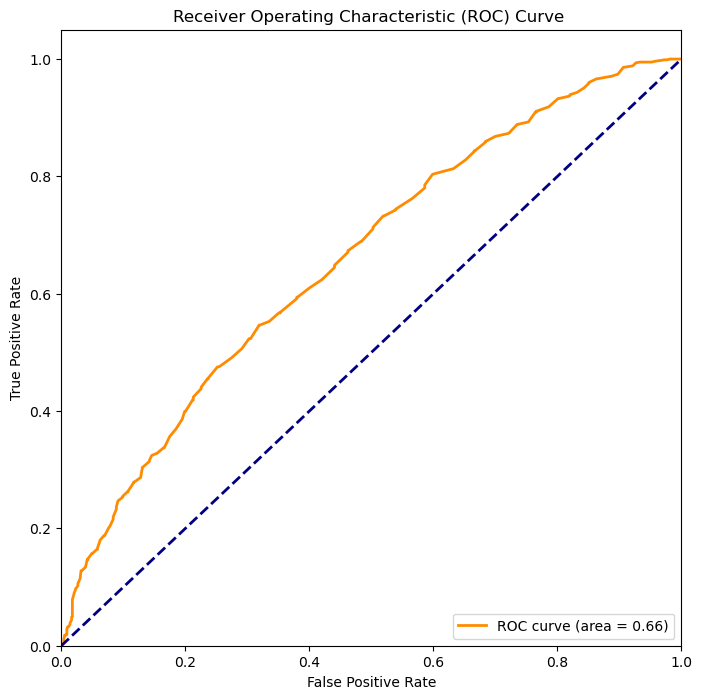

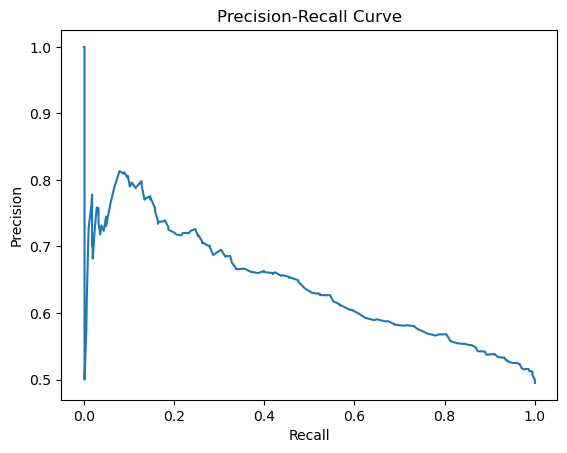

3

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 1)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
0.6401151631477927
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       790
           1       0.56      0.59      0.58       774

    accuracy                           0.57      1564
   macro avg       0.57      0.57      0.57      1564
weighted avg       0.57      0.57      0.57      1564

[[434 356]
 [318 456]]
Cross validation: mean 0.57 f1 with a standard deviation of 0.03
Cross validation: mean 0.55 precision with a standard deviation of 0.02
Cross validation: mean 0.59 recall with a standard deviation of 0.05
Cross validation: mean 0.59 auc with standard deviation of 0.02
                 Importance
Feature                    
org_reply_count         1.0


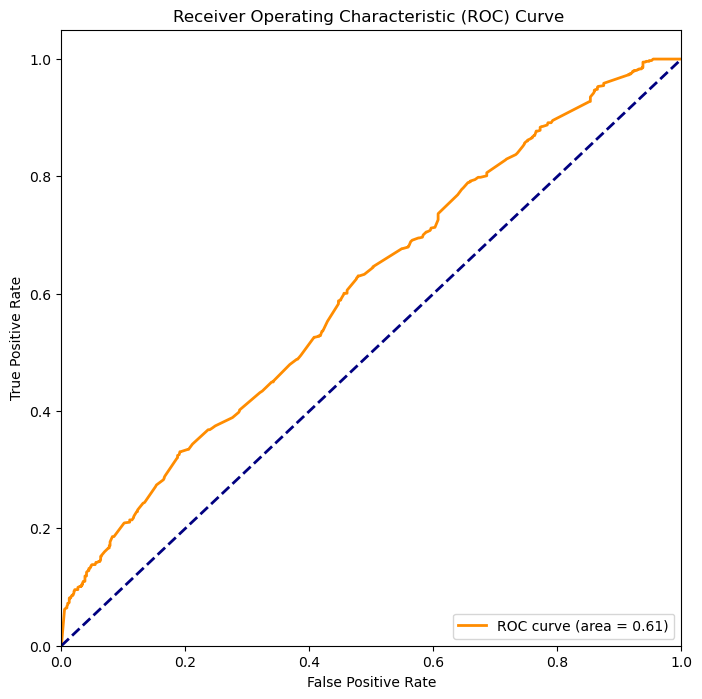

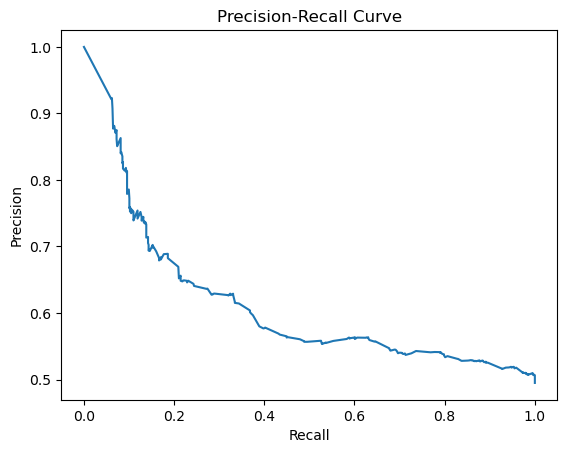

41

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 39)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
0.9996801023672425
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       790
           1       0.75      0.75      0.75       774

    accuracy                           0.75      1564
   macro avg       0.75      0.75      0.75      1564
weighted avg       0.75      0.75      0.75      1564

[[597 193]
 [193 581]]
Cross validation: mean 0.73 f1 with a standard deviation of 0.06
Cross validation: mean 0.74 precision with a standard deviation of 0.06
Cross validation: mean 0.72 recall with a standard deviation of 0.07
Cross validation: mean 0.81 auc with standard deviation of 0.06
                      Importance
Feature                         
posted_like_count       0.087024
org_reply_count         0.083788
posted_retweet_count    0.061203
entropy_reply_count     0.059666
mean_like_count         0.054040


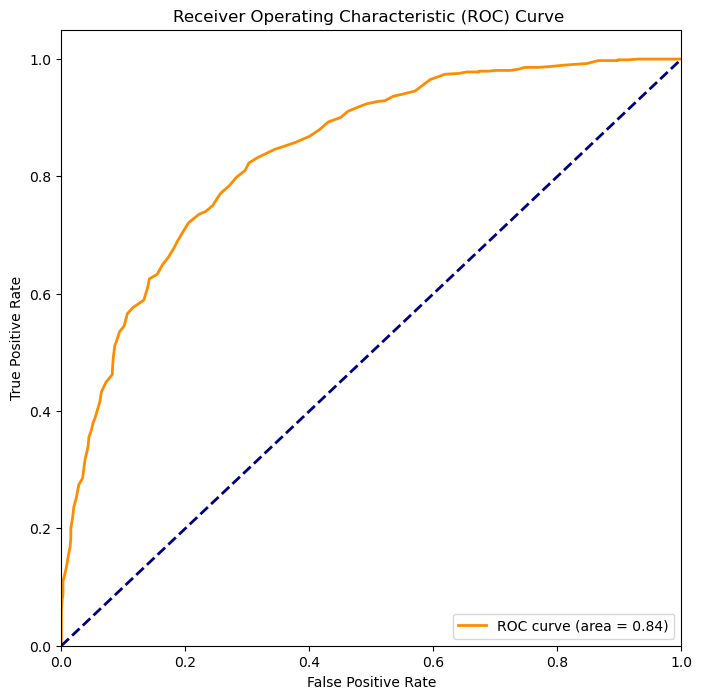

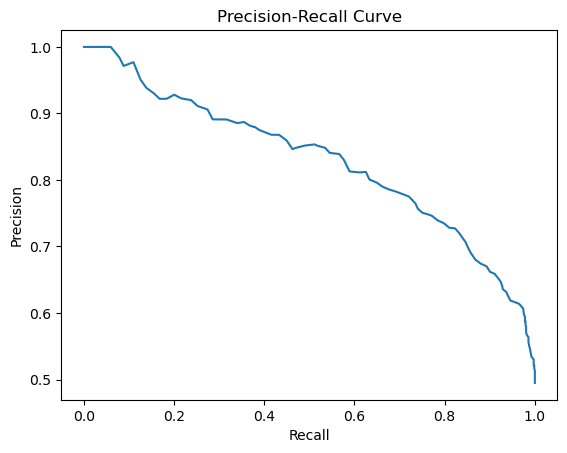

14

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 12)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       790
           1       0.62      0.63      0.63       774

    accuracy                           0.63      1564
   macro avg       0.63      0.63      0.63      1564
weighted avg       0.63      0.63      0.63      1564

[[497 293]
 [286 488]]
Cross validation: mean 0.59 f1 with a standard deviation of 0.02
Cross validation: mean 0.59 precision with a standard deviation of 0.01
Cross validation: mean 0.59 recall with a standard deviation of 0.03
Cross validation: mean 0.64 auc with standard deviation of 0.01
                 Importance
Feature                    
entropy_cosine     0.131871
skew_cosine        0.105971
kurtosis_cosine    0.105754
std_cosine         0.103326
mean_cosine        0.098750
range_cosine       0.082795
min_cosine         0.0

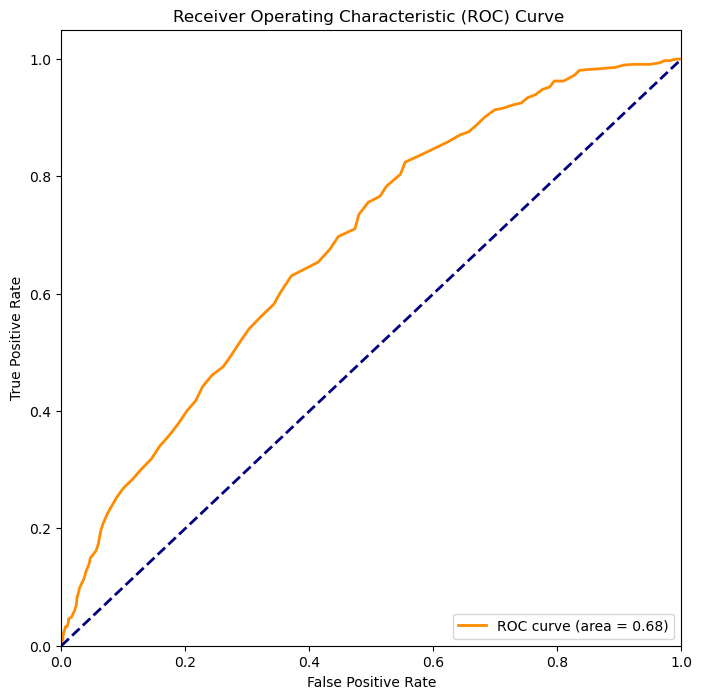

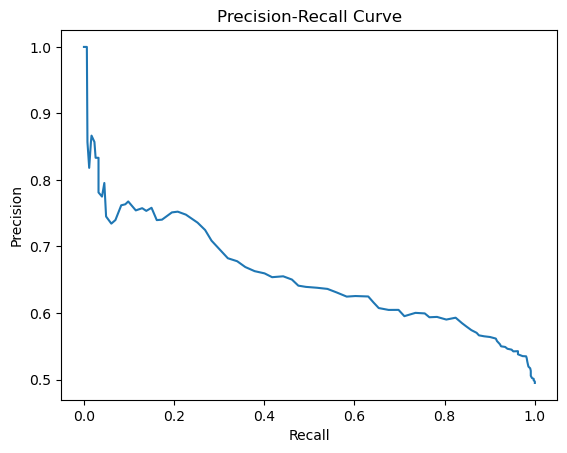

38

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 36)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
0.9121880998080614
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       790
           1       0.61      0.65      0.63       774

    accuracy                           0.62      1564
   macro avg       0.62      0.62      0.62      1564
weighted avg       0.62      0.62      0.62      1564

[[473 317]
 [274 500]]
Cross validation: mean 0.6 f1 with a standard deviation of 0.03
Cross validation: mean 0.58 precision with a standard deviation of 0.02
Cross validation: mean 0.62 recall with a standard deviation of 0.05
Cross validation: mean 0.61 auc with standard deviation of 0.03
                        Importance
Feature                           
std_mention_count         0.070406
kurtosis_mention_count    0.069834
entropy_mention_count     0.064509
mean_mention_count        0.064289
skew_mention_count    

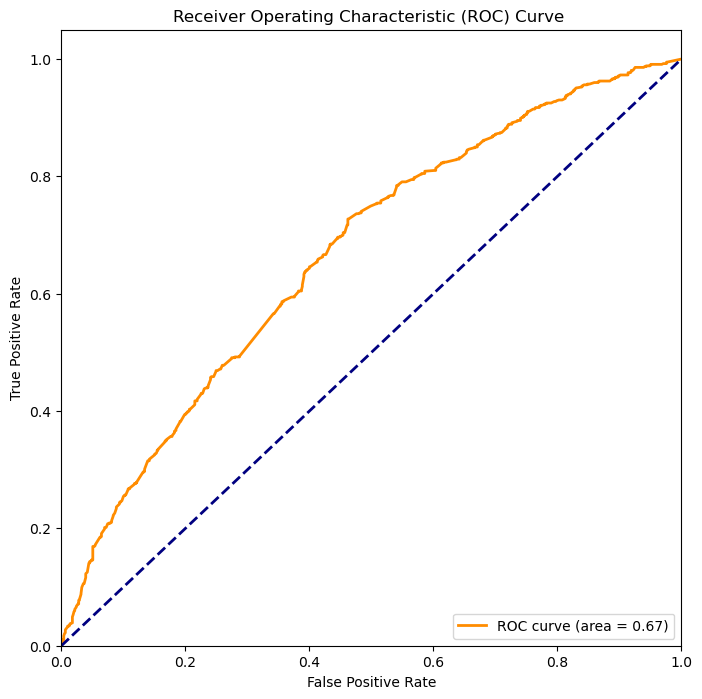

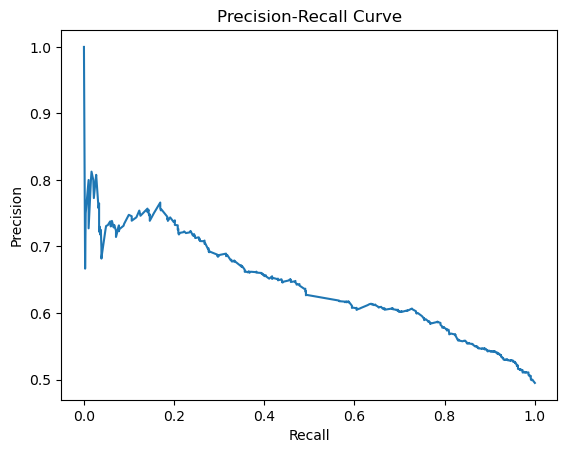

3

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 1)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
0.6583493282149712
              precision    recall  f1-score   support

           0       0.53      0.45      0.49       790
           1       0.51      0.59      0.55       774

    accuracy                           0.52      1564
   macro avg       0.52      0.52      0.52      1564
weighted avg       0.52      0.52      0.52      1564

[[355 435]
 [316 458]]
Cross validation: mean 0.51 f1 with a standard deviation of 0.03
Cross validation: mean 0.5 precision with a standard deviation of 0.02
Cross validation: mean 0.53 recall with a standard deviation of 0.04
Cross validation: mean 0.51 auc with standard deviation of 0.02
                      Importance
Feature                         
posted_retweet_count         1.0


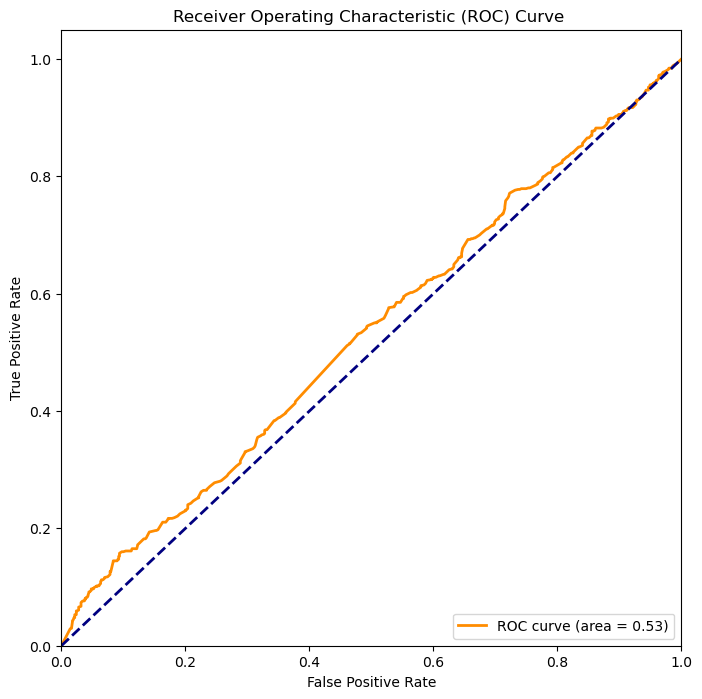

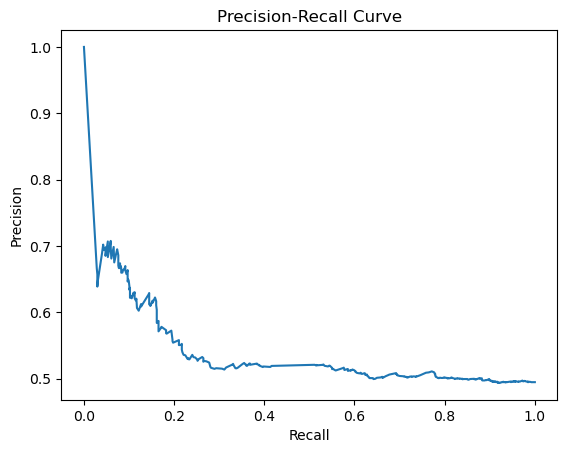

3

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 1)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
0.7319257837492003
              precision    recall  f1-score   support

           0       0.52      0.57      0.54       790
           1       0.52      0.47      0.49       774

    accuracy                           0.52      1564
   macro avg       0.52      0.52      0.52      1564
weighted avg       0.52      0.52      0.52      1564

[[448 342]
 [410 364]]
Cross validation: mean 0.52 f1 with a standard deviation of 0.03
Cross validation: mean 0.51 precision with a standard deviation of 0.04
Cross validation: mean 0.53 recall with a standard deviation of 0.04
Cross validation: mean 0.52 auc with standard deviation of 0.05
                   Importance
Feature                      
posted_like_count         1.0


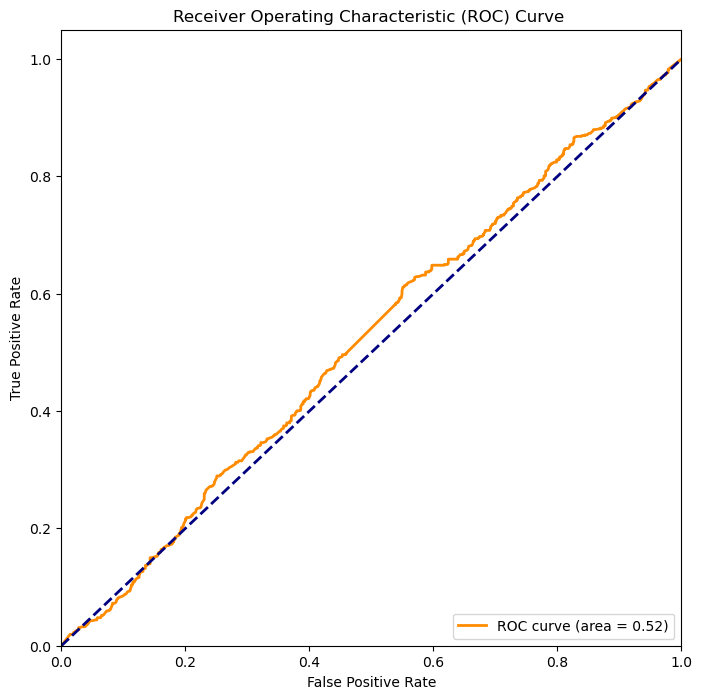

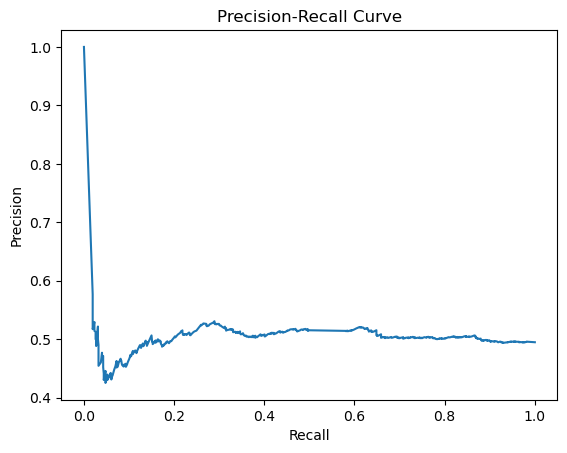

In [15]:
importlib.reload(stat_hp)

diff_features = {'Reply Time': 'diff_min',
                 'Num of reply targeted tweet got': 'org_reply_count',
                 'Engagement metric': 'like_count|retweet_count|reply_count',
                 'Reply similarity': 'cosine',
                 'Entites': 'mention_count|num_hashtags|num_url',
                 'Posted Retweet': 'posted_retweet_count', 
                 'Posted Like': 'posted_like_count'
                }

print('Running the model')

all_result = []
for feature in diff_features:
    feat = diff_features[feature] + '|tweet_label|poster_tweetid'
        
    df_filtered = df_test.filter(regex=feat, axis=1)
    
    total_col = len(df_filtered.columns)
    
    print(total_col)
    
    model, df_pred, roc_auc, prf_1, prf_0, mean_score_f1, std_score_f1, final_score = \
    stat_hp.run_model(df_filtered,
                      columns_not_include=columns_not_include,
                      model_type='random', 
                      pca=False,
                      y_column = 'tweet_label',
                      filename=None,
                      just_f1=False,
                      find_threshold=False
                     )
    
    
    # format of final_score
    # final_score = {
    #         'mean_f1': mean_score_f1,
    #         'mean_precision': mean_score_precision,
    #         'mean_recall': mean_score_recall,
    #         'mean_auc': mean_score_auc
    # }
    
    all_result.append([feat, feature, total_col, roc_auc, prf_1[0], 
                       prf_1[1], prf_1[2],
                       prf_0[0], prf_0[1], prf_0[2],
                       mean_score_f1, std_score_f1,
                       final_score['mean_f1'], final_score['mean_precision'],
                       final_score['mean_recall'], final_score['mean_auc']
                      ])

(pd.DataFrame(data=all_result,
              columns=['feature', 'Feat_Set', 'total_data',
                       'roc', 'precision_1', 'recall_1',
                       'f1_1', 'precision_0', 'recall_0',
                       'f1_0', 'mean_f1', 'std_f1',
                        'mean_f1_CV', 'mean_precision_CV',
                       'mean_recall_CV', 'mean_auc_CV'
                      ]
             )
 
).to_pickle('./data/different_feature_result.pkl.gz')

In [16]:
df_diff_feat = pd.read_pickle('./data/different_feature_result.pkl.gz')

df_diff_feat

,feature,Feat_Set,total_data,roc,precision_1,recall_1,f1_1,precision_0,recall_0,f1_0,mean_f1,std_f1,mean_f1_CV,mean_precision_CV,mean_recall_CV,mean_auc_CV
0,diff_min|tweet_label|poster_tweetid,Reply Time,14,0.658858,0.617605,0.552972,0.583504,0.602755,0.664557,0.632149,0.57,0.03,0.57,0.60,0.55,0.64
1,org_reply_count|tweet_label|poster_tweetid,Num of reply targeted tweet got,3,0.605295,0.561576,0.589147,0.575032,0.577128,0.549367,0.562905,0.57,0.03,0.57,0.55,0.59,0.59
2,like_count|retweet_count|reply_count|tweet_lab...,Engagement metric,41,0.838591,0.750646,0.750646,0.750646,0.755696,0.755696,0.755696,0.73,0.06,0.73,0.74,0.72,0.81
3,cosine|tweet_label|poster_tweetid,Reply similarity,14,0.682725,0.624840,0.630491,0.627653,0.634738,0.629114,0.631914,0.59,0.02,0.59,0.59,0.59,0.64
4,mention_count|num_hashtags|num_url|tweet_label...,Entites,38,0.666407,0.611995,0.645995,0.628536,0.633199,0.598734,0.615485,0.60,0.03,0.60,0.58,0.62,0.61
5,posted_retweet_count|tweet_label|poster_tweetid,Posted Retweet,3,0.530517,0.512878,0.591731,0.549490,0.529061,0.449367,0.485969,0.51,0.03,0.51,0.50,0.53,0.51
6,posted_like_count|tweet_label|poster_tweetid,Posted Like,3,0.519494,0.515581,0.470284,0.491892,0.522145,0.567089,0.543689,0.52,0.03,0.52,0.51,0.53,0.52


In [19]:
df_diff_feat[['Feat_Set', 
              'mean_precision_CV', 
              'mean_recall_CV',
              'mean_f1_CV', 
              'mean_auc_CV'
             ]].sort_values(by='mean_auc_CV',
                            ascending=False
                           )

,Feat_Set,mean_precision_CV,mean_recall_CV,mean_f1_CV,mean_auc_CV
2,Engagement metric,0.74,0.72,0.73,0.81
0,Reply Time,0.60,0.55,0.57,0.64
3,Reply similarity,0.59,0.59,0.59,0.64
4,Entites,0.58,0.62,0.60,0.61
1,Num of reply targeted tweet got,0.55,0.59,0.57,0.59
6,Posted Like,0.51,0.53,0.52,0.52
5,Posted Retweet,0.50,0.53,0.51,0.51


#### **Removing each feature set and check the result**

In [20]:
len(list(df_test.columns))

101

In [21]:
'tweet_label' in df_test.columns

True

In [5]:
df_test = df_test.rename(columns={
    'posted_retweet_count': 'PRT',
    'posted_like_count': 'PLT',
    'org_reply_count': 'PRPT'
})

Running the model
Removing the feature Reply Time
['diff_min']
['range_diff_min', 'entropy_diff_min', 'kurtosis_diff_min', '25%_diff_min', 'max_diff_min', 'min_diff_min', 'std_diff_min', '50%_diff_min', 'iqr_diff_min', '75%_diff_min', 'skew_diff_min', 'mean_diff_min']
12
89
89
Running the model
Total features  89

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 87)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       790
           1       0.81      0.80      0.80       774

    accuracy                           0.80      1564
   macro avg       0.80      0.80      0.80      1564
weighted avg       0.80      0.80      0.80      1564

[[642 148]
 [158 616]]
Cross validation: mean 0.76 f1 with a standard deviation of 0.04
Cross validation: mean 0.76 precision with a standard deviation of 0.06
Cross validation: mean 0.76 recall with a standard deviation of 0.0

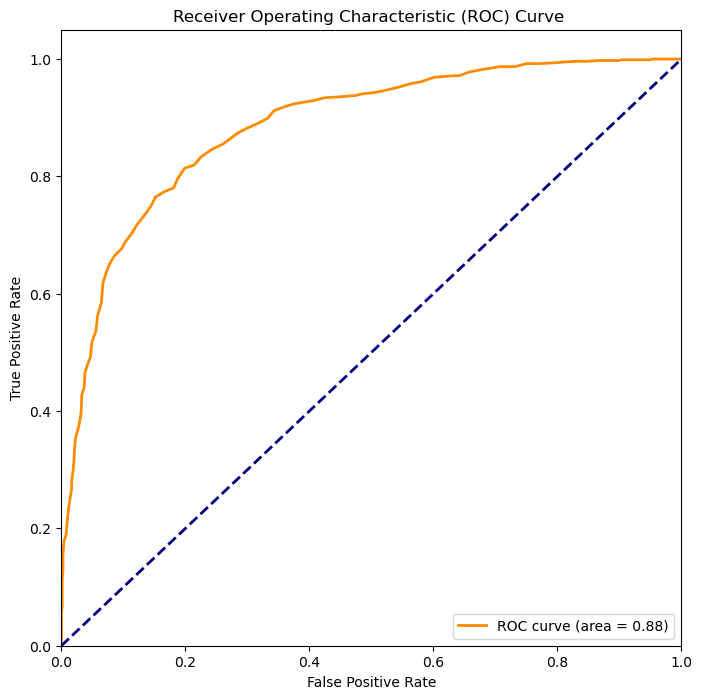

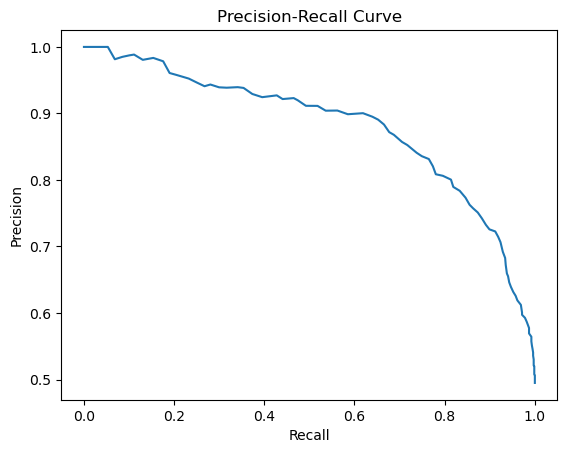

[['All without Reply Time', 'All without Reply Time', 89, 0.8845198377653485, 0.806282722513089, 0.7958656330749354, 0.801040312093628, 0.8025, 0.8126582278481013, 0.8075471698113207, 0.76, 0.04, 0.76, 0.76, 0.76, 0.84]]
Removing the feature Num of reply targeted tweet got
['PRPT']
[]
0
101
101
Running the model
Total features  101

 **** random ****
[1 0]
Xtrain:  6252
Xtrain shape:  (6252, 99)
Xtest:  1564
Ytrain:  6252
Ytest:  1564
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       790
           1       0.81      0.83      0.82       774

    accuracy                           0.82      1564
   macro avg       0.82      0.82      0.82      1564
weighted avg       0.82      0.82      0.82      1564

[[639 151]
 [135 639]]
Cross validation: mean 0.76 f1 with a standard deviation of 0.04
Cross validation: mean 0.77 precision with a standard deviation of 0.06
Cross validation: mean 0.76 recall with a standa

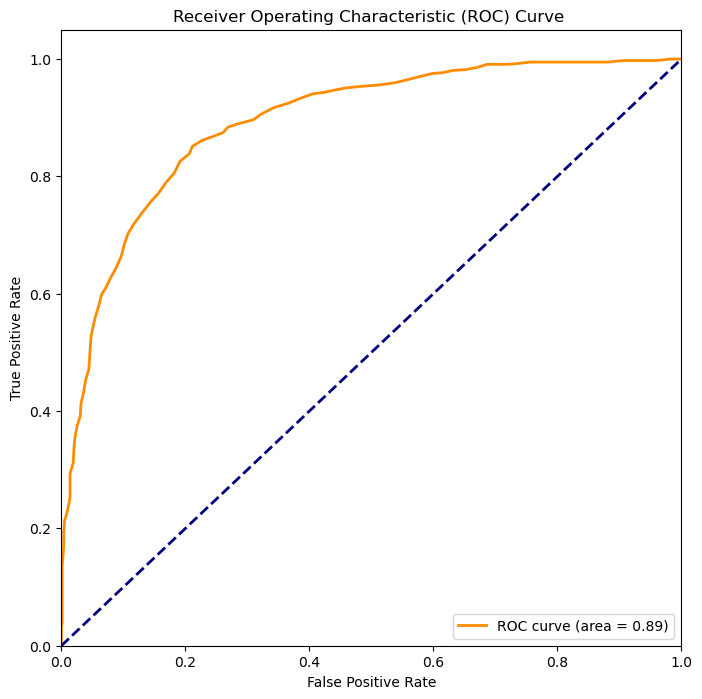

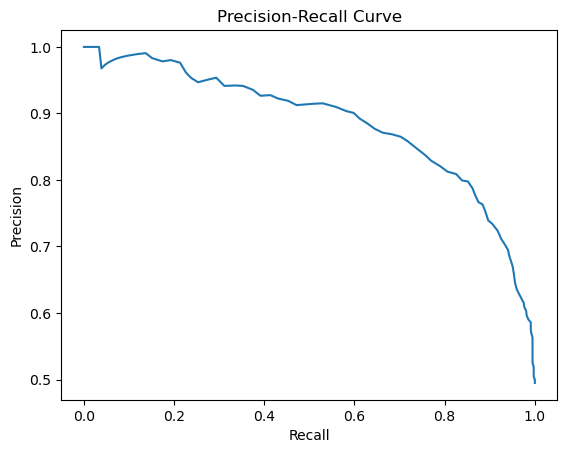

[['All without Reply Time', 'All without Reply Time', 89, 0.8845198377653485, 0.806282722513089, 0.7958656330749354, 0.801040312093628, 0.8025, 0.8126582278481013, 0.8075471698113207, 0.76, 0.04, 0.76, 0.76, 0.76, 0.84], ['All without Num of reply targeted tweet got', 'All without Num of reply targeted tweet got', 101, 0.891505576816145, 0.8088607594936709, 0.8255813953488372, 0.8171355498721228, 0.8255813953488372, 0.8088607594936709, 0.8171355498721228, 0.76, 0.04, 0.76, 0.77, 0.76, 0.84]]
Removing the feature Engagement metric
['like_count', 'retweet_count', 'reply_count']
['kurtosis_like_count', 'range_like_count', 'skew_like_count', 'mean_like_count', '75%_like_count', 'std_like_count', 'iqr_like_count', 'entropy_like_count', 'posted_like_count', 'min_like_count', '50%_like_count', '25%_like_count', 'max_like_count', 'std_retweet_count', 'posted_retweet_count', 'skew_retweet_count', '75%_retweet_count', 'min_retweet_count', 'iqr_retweet_count', 'kurtosis_retweet_count', '25%_retwe

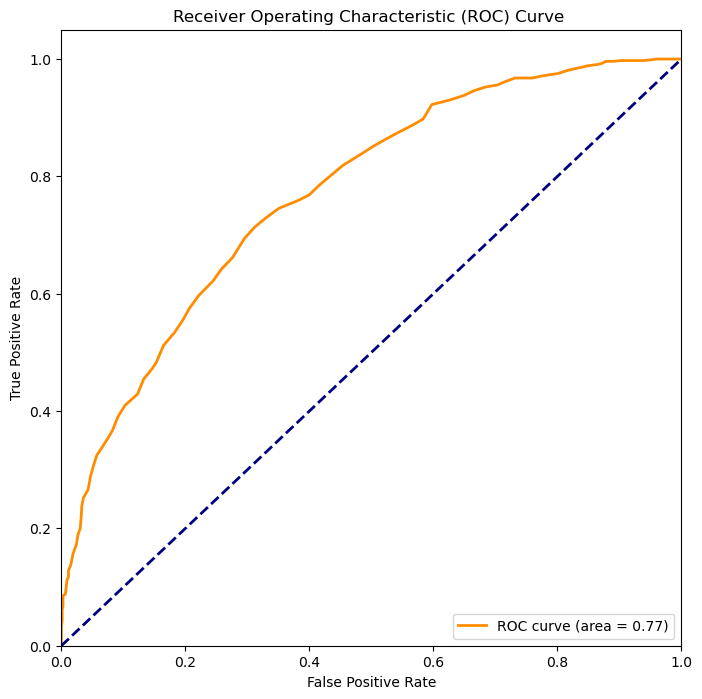

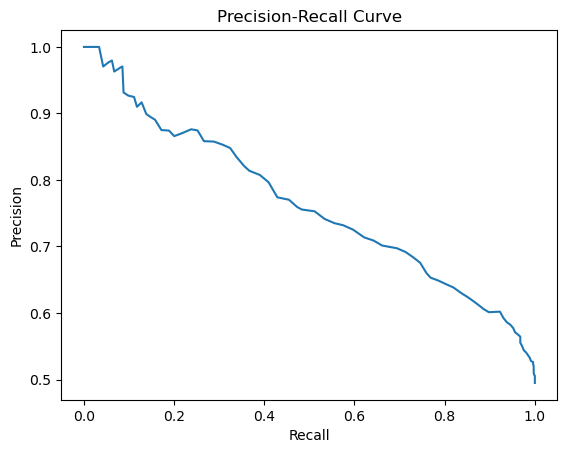

[['All without Reply Time', 'All without Reply Time', 89, 0.8845198377653485, 0.806282722513089, 0.7958656330749354, 0.801040312093628, 0.8025, 0.8126582278481013, 0.8075471698113207, 0.76, 0.04, 0.76, 0.76, 0.76, 0.84], ['All without Num of reply targeted tweet got', 'All without Num of reply targeted tweet got', 101, 0.891505576816145, 0.8088607594936709, 0.8255813953488372, 0.8171355498721228, 0.8255813953488372, 0.8088607594936709, 0.8171355498721228, 0.76, 0.04, 0.76, 0.77, 0.76, 0.84], ['All without Engagement metric', 'All without Engagement metric', 62, 0.7708811696595035, 0.7013698630136986, 0.661498708010336, 0.6808510638297873, 0.6858513189448441, 0.7240506329113924, 0.7044334975369457, 0.66, 0.04, 0.66, 0.67, 0.65, 0.73]]
Removing the feature Reply similarity
['cosine']
['kurtosis_cosine', 'skew_cosine', 'mean_cosine', '50%_cosine', 'max_cosine', 'range_cosine', 'iqr_cosine', '25%_cosine', 'std_cosine', '75%_cosine', 'min_cosine', 'entropy_cosine']
12
89
89
Running the mode

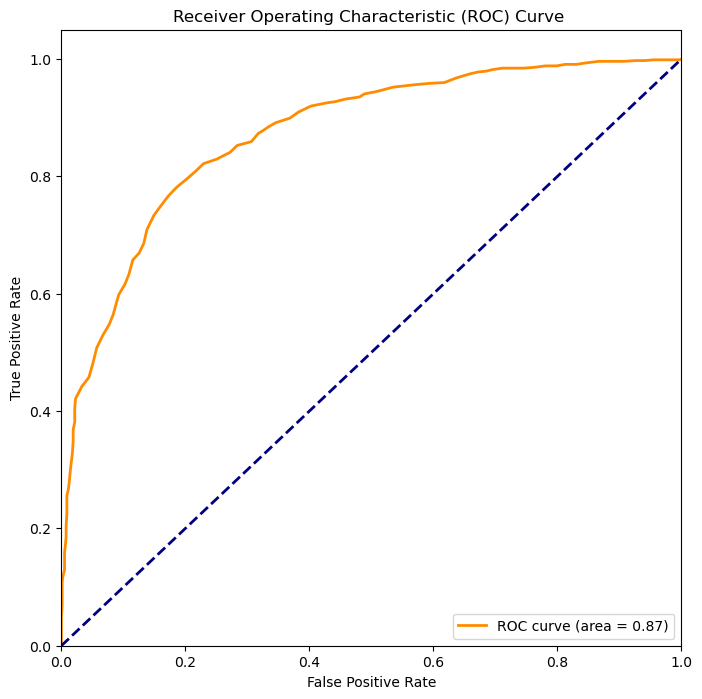

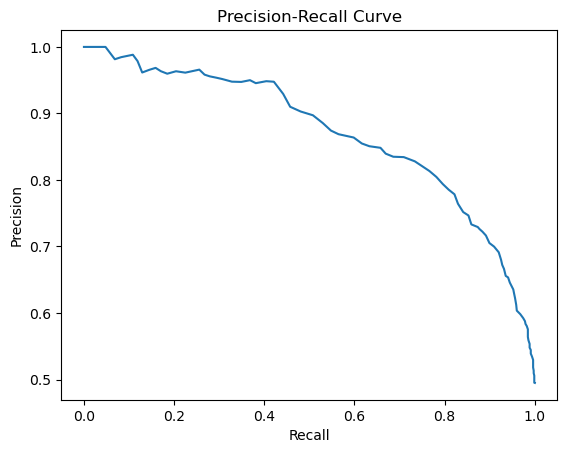

[['All without Reply Time', 'All without Reply Time', 89, 0.8845198377653485, 0.806282722513089, 0.7958656330749354, 0.801040312093628, 0.8025, 0.8126582278481013, 0.8075471698113207, 0.76, 0.04, 0.76, 0.76, 0.76, 0.84], ['All without Num of reply targeted tweet got', 'All without Num of reply targeted tweet got', 101, 0.891505576816145, 0.8088607594936709, 0.8255813953488372, 0.8171355498721228, 0.8255813953488372, 0.8088607594936709, 0.8171355498721228, 0.76, 0.04, 0.76, 0.77, 0.76, 0.84], ['All without Engagement metric', 'All without Engagement metric', 62, 0.7708811696595035, 0.7013698630136986, 0.661498708010336, 0.6808510638297873, 0.6858513189448441, 0.7240506329113924, 0.7044334975369457, 0.66, 0.04, 0.66, 0.67, 0.65, 0.73], ['All without Reply similarity', 'All without Reply similarity', 89, 0.8724152029568573, 0.7854454203262233, 0.8087855297157622, 0.7969446212603436, 0.8070404172099087, 0.7835443037974683, 0.7951188182402055, 0.75, 0.05, 0.75, 0.75, 0.75, 0.83]]
Removing t

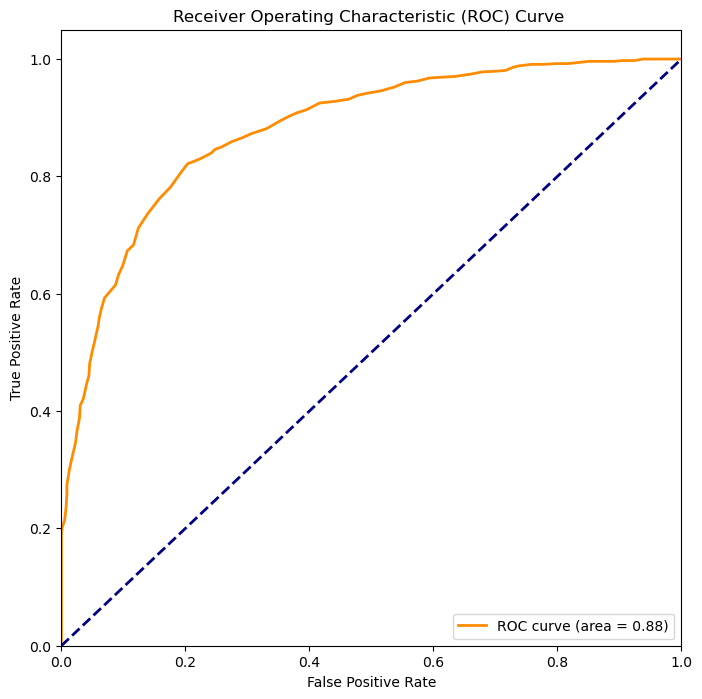

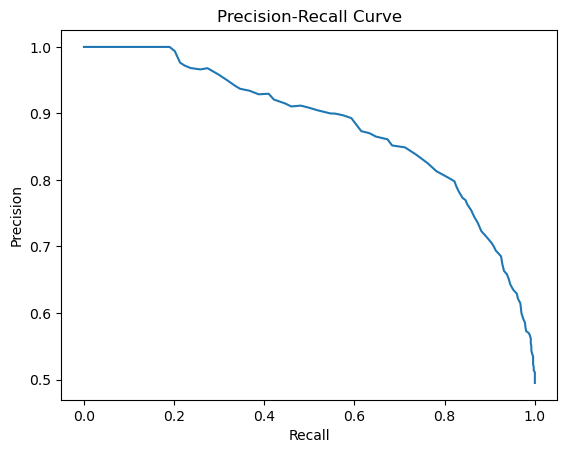

[['All without Reply Time', 'All without Reply Time', 89, 0.8845198377653485, 0.806282722513089, 0.7958656330749354, 0.801040312093628, 0.8025, 0.8126582278481013, 0.8075471698113207, 0.76, 0.04, 0.76, 0.76, 0.76, 0.84], ['All without Num of reply targeted tweet got', 'All without Num of reply targeted tweet got', 101, 0.891505576816145, 0.8088607594936709, 0.8255813953488372, 0.8171355498721228, 0.8255813953488372, 0.8088607594936709, 0.8171355498721228, 0.76, 0.04, 0.76, 0.77, 0.76, 0.84], ['All without Engagement metric', 'All without Engagement metric', 62, 0.7708811696595035, 0.7013698630136986, 0.661498708010336, 0.6808510638297873, 0.6858513189448441, 0.7240506329113924, 0.7044334975369457, 0.66, 0.04, 0.66, 0.67, 0.65, 0.73], ['All without Reply similarity', 'All without Reply similarity', 89, 0.8724152029568573, 0.7854454203262233, 0.8087855297157622, 0.7969446212603436, 0.8070404172099087, 0.7835443037974683, 0.7951188182402055, 0.75, 0.05, 0.75, 0.75, 0.75, 0.83], ['All with

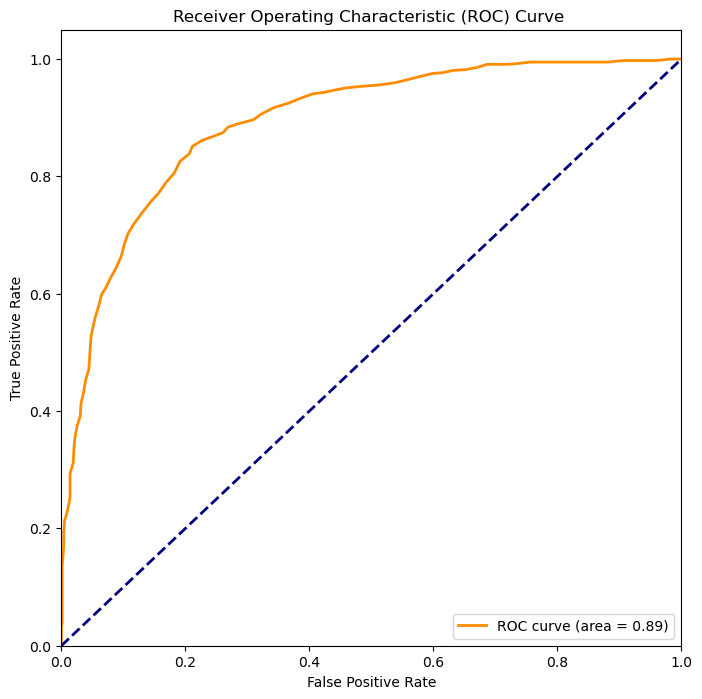

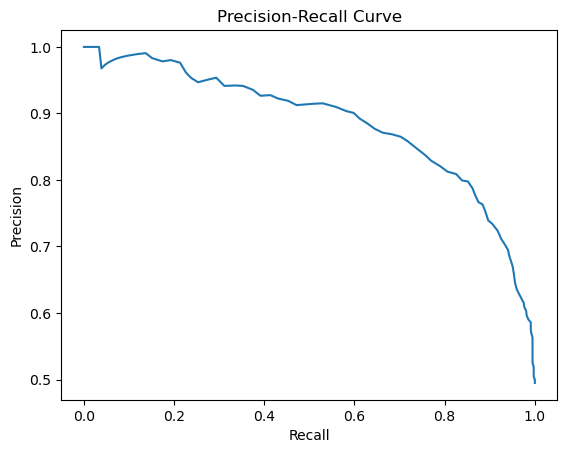

[['All without Reply Time', 'All without Reply Time', 89, 0.8845198377653485, 0.806282722513089, 0.7958656330749354, 0.801040312093628, 0.8025, 0.8126582278481013, 0.8075471698113207, 0.76, 0.04, 0.76, 0.76, 0.76, 0.84], ['All without Num of reply targeted tweet got', 'All without Num of reply targeted tweet got', 101, 0.891505576816145, 0.8088607594936709, 0.8255813953488372, 0.8171355498721228, 0.8255813953488372, 0.8088607594936709, 0.8171355498721228, 0.76, 0.04, 0.76, 0.77, 0.76, 0.84], ['All without Engagement metric', 'All without Engagement metric', 62, 0.7708811696595035, 0.7013698630136986, 0.661498708010336, 0.6808510638297873, 0.6858513189448441, 0.7240506329113924, 0.7044334975369457, 0.66, 0.04, 0.66, 0.67, 0.65, 0.73], ['All without Reply similarity', 'All without Reply similarity', 89, 0.8724152029568573, 0.7854454203262233, 0.8087855297157622, 0.7969446212603436, 0.8070404172099087, 0.7835443037974683, 0.7951188182402055, 0.75, 0.05, 0.75, 0.75, 0.75, 0.83], ['All with

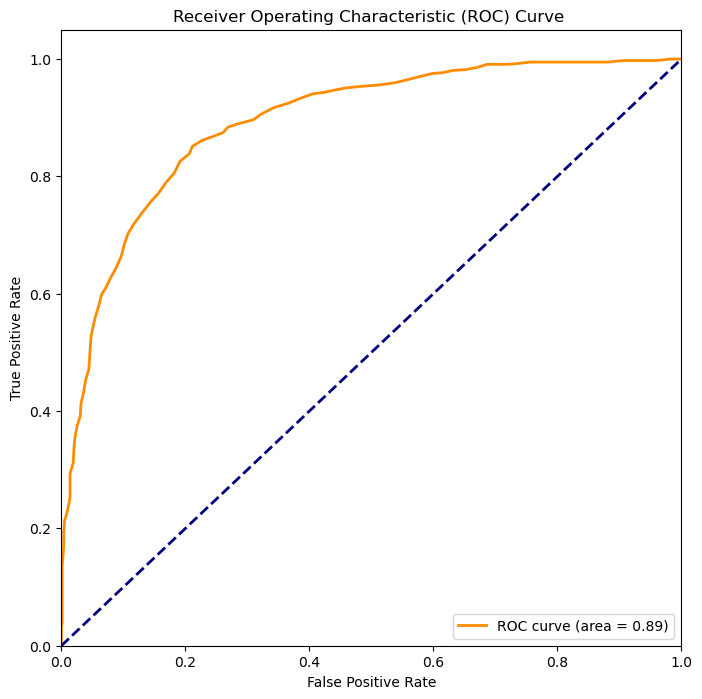

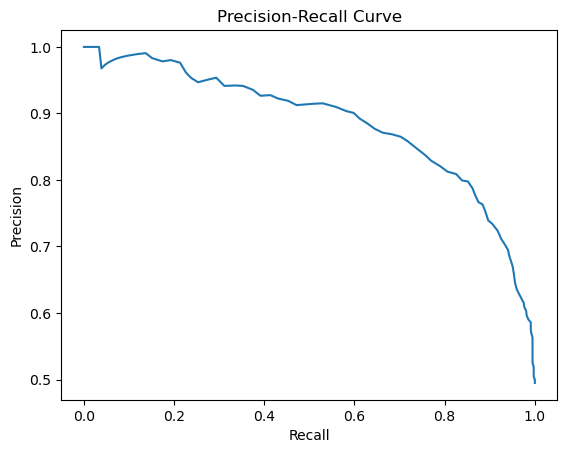

[['All without Reply Time', 'All without Reply Time', 89, 0.8845198377653485, 0.806282722513089, 0.7958656330749354, 0.801040312093628, 0.8025, 0.8126582278481013, 0.8075471698113207, 0.76, 0.04, 0.76, 0.76, 0.76, 0.84], ['All without Num of reply targeted tweet got', 'All without Num of reply targeted tweet got', 101, 0.891505576816145, 0.8088607594936709, 0.8255813953488372, 0.8171355498721228, 0.8255813953488372, 0.8088607594936709, 0.8171355498721228, 0.76, 0.04, 0.76, 0.77, 0.76, 0.84], ['All without Engagement metric', 'All without Engagement metric', 62, 0.7708811696595035, 0.7013698630136986, 0.661498708010336, 0.6808510638297873, 0.6858513189448441, 0.7240506329113924, 0.7044334975369457, 0.66, 0.04, 0.66, 0.67, 0.65, 0.73], ['All without Reply similarity', 'All without Reply similarity', 89, 0.8724152029568573, 0.7854454203262233, 0.8087855297157622, 0.7969446212603436, 0.8070404172099087, 0.7835443037974683, 0.7951188182402055, 0.75, 0.05, 0.75, 0.75, 0.75, 0.83], ['All with

In [27]:
columns_to_keep = list(df_test.columns)

diff_features = {'Reply Time': 'diff_min',
                 'Num of reply targeted tweet got': 'PRPT',
                 'Engagement metric': 'like_count|retweet_count|reply_count',
                 'Reply similarity': 'cosine',
                 'Entites': 'mention_count|num_hashtags|num_url',
                 'Posted Retweet': 'PRT', 
                 'Posted Like': 'PLT'
                }

print('Running the model')

import copy

all_result = []
for feature in diff_features:
    print(f'Removing the feature {feature}')
    
    feat = diff_features[feature]
    
    parts = feat.split('|')
    print(parts)
    
    all_match_set = []
    for part in parts:
        specific_string = part
        matching_test = [col for col in columns_to_keep if specific_string in col]

        all_match_set.extend(matching_test)
        
    
    keep_this = list(set(columns_to_keep) - set(all_match_set))

    print(all_match_set)
    print(len(all_match_set))
    print(len(keep_this))
    
    print(101 - len(all_match_set))
    
    print('Running the model')

    df_sample = df_test[keep_this]
    
    total_col = len(keep_this)
    
    print('Total features ', total_col)

    feat = f'All without {feature}'
    feature = f'All without {feature}'

    model, df_pred, roc_auc, prf_1, prf_0, mean_score_f1, std_score_f1, final_score = \
    stat_hp.run_model(df_sample,
                      columns_not_include=[],
                      model_type='random', 
                      pca=False,
                      y_column = 'tweet_label',
                      filename=None,
                      just_f1=False,
                      find_threshold=False
                     )

    #  final_score = {
    #         'mean_f1': mean_score_f1,
    #         'mean_precision': mean_score_precision,
    #         'mean_recall': mean_score_recall,
    #         'mean_auc': mean_score_auc
    # }

    all_result.append([feat, feature, total_col, roc_auc, prf_1[0], 
                       prf_1[1], prf_1[2],
                       prf_0[0], prf_0[1], prf_0[2],
                       mean_score_f1, std_score_f1,
                       final_score['mean_f1'], final_score['mean_precision'],
                       final_score['mean_recall'], final_score['mean_auc']
                      ])
    print(all_result)


filename = './data/different_feature_result_without_each_features.pkl.gz'

(pd.DataFrame(data=all_result,
              columns=['feature', 'Feat_Set', 'total_data',
                       'roc', 'precision_1', 'recall_1',
                       'f1_1', 'precision_0', 'recall_0',
                       'f1_0', 'mean_f1', 'std_f1',
                        'mean_f1_CV', 'mean_precision_CV',
                       'mean_recall_CV', 'mean_auc_CV'
                      ]
             )
 
).to_pickle(filename)

In [2]:
import pandas as pd

In [30]:
filename = './data/different_feature_result_without_each_features.pkl.gz'

df_without = pd.read_pickle(filename)

df_without.sort_values(by='mean_f1_CV',
                       ascending=False
                      )[['feature', 'mean_precision_CV', 
                         'mean_recall_CV',
                         'mean_f1_CV', 'mean_auc_CV',  
                         ]]

,feature,mean_precision_CV,mean_recall_CV,mean_f1_CV,mean_auc_CV
0,All without Reply Time,0.76,0.76,0.76,0.84
1,All without Num of reply targeted tweet got,0.77,0.76,0.76,0.84
4,All without Entites,0.76,0.76,0.76,0.84
5,All without Posted Retweet,0.77,0.76,0.76,0.84
6,All without Posted Like,0.77,0.76,0.76,0.84
3,All without Reply similarity,0.75,0.75,0.75,0.83
2,All without Engagement metric,0.67,0.65,0.66,0.73
